In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [143]:
codebook  = pd.read_csv('/Users/leonardocardozo/Downloads/Data/Documentation/codebook.csv')

Look at checkpoints pulse and see if students utility scores correlate with how engaged they are

In [144]:
checkpoints_pulse = pd.read_csv('/Users/leonardocardozo/Downloads/Data/Full Data/checkpoints_pulse.csv')

In [145]:
checkpoints_pulse.head()

,book,release,institution_id,class_id,student_id,chapter_number,construct,response
0,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,10,Cost,NaN
1,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,11,Cost,NaN
2,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,12,Cost,NaN
3,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2,Cost,4.0
4,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,3,Cost,4.0


In [33]:
checkpoints_pulse['construct'].unique()

array(['Cost', 'Expectancy', 'Intrinsic Value', 'Utility Value'],
      dtype=object)

In [58]:
# Filter by Utility value
checkpoints_pulse = checkpoints_pulse[checkpoints_pulse['construct'] == 'Utility Value']

In [133]:
list(codebook[codebook['variable'] == 'engaged']['description'])[0]

'The amount of time the user was considered "engaged", in milliseconds, in the material. To maintain engagement, the user must do something on the page (click, mouse movement, scroll, etc.) at least every 2 minutes.'

In [59]:
# Drop NA's in response value
checkpoints_pulse = checkpoints_pulse.dropna(subset=['response'])

In [60]:
checkpoints_pulse.head()

,book,release,institution_id,class_id,student_id,chapter_number,construct,response
36,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2,Utility Value,4.0
37,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,3,Utility Value,4.0
39,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,5,Utility Value,3.0
40,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,6,Utility Value,3.0
42,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,8,Utility Value,2.0


In [45]:
# Checks for chapter before
checkpoints_pulse['chapter_number'].unique()

array([ 2,  3,  5,  6,  8, 10, 11, 12,  4,  7,  9, 13])

In [61]:
checkpoints_pulse['chapter_number'] = checkpoints_pulse['chapter_number'] - 1

In [67]:
checkpoints_pulse['chapter_number'].dtype

dtype('int64')

In [62]:
page_df = pd.read_csv('/Users/leonardocardozo/Downloads/Data/Full Data/page_views.csv')

/var/folders/x0/931fhxmx2r92gt419vlj0whr0000gn/T/ipykernel_5256/192624411.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  page_df = pd.read_csv('/Users/leonardocardozo/Downloads/Data/Full Data/page_views.csv')


In [47]:
page_df.head()

,book,release,chapter,page,chapter_number,section_number,institution_id,class_id,student_id,dt_accessed,was_complete,tried_again_dt,tried_again_clicks,engaged,idle_brief,idle_long,off_page_brief,off_page_long,review_flag
0,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T03:45:38Z,False,NaN,0,58341.0,0.0,0.0,0.0,0.0,False
1,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-12T03:13:17Z,False,NaN,0,128493.0,0.0,0.0,25928.0,0.0,False
2,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T03:06:15Z,False,NaN,0,101640.0,0.0,0.0,0.0,0.0,False
3,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T04:08:24Z,False,NaN,0,97608.0,0.0,0.0,0.0,0.0,False
4,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.4 Introduction to R Functions,1.0,4.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T03:07:58Z,False,NaN,0,177173.0,0.0,0.0,0.0,0.0,False


In [63]:
average_engagement = page_df.groupby(['student_id', 'chapter_number'])['engaged'].mean().reset_index()


In [68]:
average_engagement['chapter_number'] = average_engagement['chapter_number'].astype('int64')

In [89]:
engagement_utility = pd.merge(checkpoints_pulse, average_engagement, on = ["student_id", "chapter_number"], how = 'left')

In [90]:
engagement_utility.head()

,book,release,institution_id,class_id,student_id,chapter_number,construct,response,engaged
0,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,1,Utility Value,4.0,296326.384615
1,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2,Utility Value,4.0,277559.064516
2,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,4,Utility Value,3.0,NaN
3,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,5,Utility Value,3.0,148563.333333
4,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,7,Utility Value,2.0,NaN


In [91]:
engagement_utility['response'].corr(engagement_utility['engaged'])

0.053586978786725255

In [92]:
engagement_utility.dropna(subset=['engaged'], inplace=True)

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [96]:
X = engagement_utility[['response']]
Y = engagement_utility['engaged']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [98]:
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the target variable using the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [99]:
print(mse)
print(r2)

69922045999.8593
-0.00017560049495379815


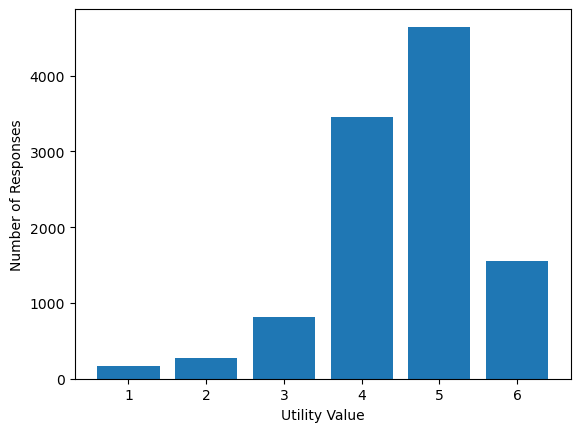

In [103]:
plt.bar(engagement_utility['response'].value_counts().index, engagement_utility['response'].value_counts().values)
plt.xlabel('Utility Value')
plt.ylabel('Number of Responses')
plt.show()

In [107]:
engagement_utility.describe()

,chapter_number,response,engaged
count,10911.000000,10911.000000,1.091100e+04
mean,5.823481,4.538356,3.500847e+05
std,3.202543,1.011288,2.595956e+05
min,1.000000,1.000000,1.832000e+03
25%,3.000000,4.000000,2.024778e+05
50%,6.000000,5.000000,3.018573e+05
75%,8.000000,5.000000,4.293001e+05
max,12.000000,6.000000,5.296517e+06


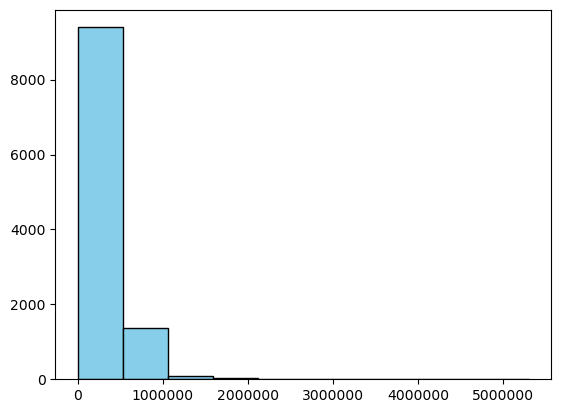

In [109]:
plt.hist(engagement_utility['engaged'], bins=10, color='skyblue', edgecolor='black')
plt.ticklabel_format(style='plain', axis='both')
plt.show()

Rank the chapters by usefulness, rank the chapters by how interesting they are

In [117]:
checkpoints_pulse = pd.read_csv('/Users/leonardocardozo/Downloads/Data/Full Data/checkpoints_pulse.csv')

In [118]:
checkpoints_pulse.dropna(subset=['response'], inplace=True)

In [119]:
checkpoints_pulse['chapter_number'] = checkpoints_pulse['chapter_number'] - 1

In [120]:
useful = checkpoints_pulse[checkpoints_pulse['construct'] == 'Utility Value']
interesting = checkpoints_pulse[checkpoints_pulse['construct'] == 'Intrinsic Value']

In [121]:
useful.head()

,book,release,institution_id,class_id,student_id,chapter_number,construct,response
36,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,1,Utility Value,4.0
37,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2,Utility Value,4.0
39,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,4,Utility Value,3.0
40,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,5,Utility Value,3.0
42,College / Statistics and Data Science (ABC),v5.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,7,Utility Value,2.0


In [123]:
useful.groupby('chapter_number')['response'].mean().sort_values()

chapter_number
8     4.426018
7     4.476967
6     4.496262
5     4.508637
3     4.515181
2     4.529954
4     4.535922
9     4.536232
10    4.539424
11    4.557841
12    4.670588
1     4.736372
Name: response, dtype: float64

In [124]:
interesting.groupby('chapter_number')['response'].mean().sort_values()

chapter_number
8     4.412714
7     4.423459
6     4.450476
5     4.500000
9     4.500000
11    4.504551
3     4.507042
4     4.517378
2     4.524125
10    4.534194
12    4.541176
1     4.690674
Name: response, dtype: float64

In [146]:
page_df = pd.read_csv('/Users/leonardocardozo/Downloads/Data/Full Data/page_views.csv')

/var/folders/x0/931fhxmx2r92gt419vlj0whr0000gn/T/ipykernel_5256/192624411.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  page_df = pd.read_csv('/Users/leonardocardozo/Downloads/Data/Full Data/page_views.csv')


In [147]:
page_df.head()

,book,release,chapter,page,chapter_number,section_number,institution_id,class_id,student_id,dt_accessed,was_complete,tried_again_dt,tried_again_clicks,engaged,idle_brief,idle_long,off_page_brief,off_page_long,review_flag
0,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T03:45:38Z,False,NaN,0,58341.0,0.0,0.0,0.0,0.0,False
1,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-12T03:13:17Z,False,NaN,0,128493.0,0.0,0.0,25928.0,0.0,False
2,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T03:06:15Z,False,NaN,0,101640.0,0.0,0.0,0.0,0.0,False
3,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T04:08:24Z,False,NaN,0,97608.0,0.0,0.0,0.0,0.0,False
4,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.4 Introduction to R Functions,1.0,4.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T03:07:58Z,False,NaN,0,177173.0,0.0,0.0,0.0,0.0,False


In [148]:
page_df.dropna(subset=['engaged'], inplace = True)

In [149]:
page_stats = page_df.groupby('page')['engaged'].agg(['mean', 'std']).reset_index()

In [150]:
# Merge page_stats back to the original DataFrame
df = pd.merge(page_df, page_stats, on='page', how='left')

# Calculate standardized engagement (z-score) for each student on each page
df['standardized_engagement'] = (df['engaged'] - df['mean']) / df['std']

# Drop 'mean' and 'std' columns if you don't need them anymore
df.drop(['mean', 'std'], axis=1, inplace=True)


In [151]:
df

,book,release,chapter,page,chapter_number,section_number,institution_id,class_id,student_id,dt_accessed,was_complete,tried_again_dt,tried_again_clicks,engaged,idle_brief,idle_long,off_page_brief,off_page_long,review_flag,standardized_engagement
0,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T03:45:38Z,False,NaN,0,58341.0,0.0,0.0,0.0,0.0,False,-0.240025
1,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-12T03:13:17Z,False,NaN,0,128493.0,0.0,0.0,25928.0,0.0,False,-0.103049
2,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T03:06:15Z,False,NaN,0,101640.0,0.0,0.0,0.0,0.0,False,-0.155481
3,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.3 Doing Statistics with R,1.0,3.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T04:08:24Z,False,NaN,0,97608.0,0.0,0.0,0.0,0.0,False,-0.163354
4,College / Statistics and Data Science (ABC),v5.0,Chapter 1 - Welcome to Statistics: A Modeling ...,1.4 Introduction to R Functions,1.0,4.0,04157183-8665-400a-925d-3bbb70ffe45e,afcb6b4e-a0c0-46ce-b38c-c96329c91471,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,2023-01-14T03:07:58Z,False,NaN,0,177173.0,0.0,0.0,0.0,0.0,False,0.021918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451538,High School / Advanced Statistics and Data Sci...,v5.0,Getting Started (Don't Skip This Part),First Things First! (Don't Skip This Page),NaN,NaN,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,eb698b03-c893-4700-90d1-e75faebf34a3,2023-02-01T02:11:39Z,False,NaN,0,104688.0,0.0,0.0,177052.0,0.0,False,-0.226866
451539,High School / Advanced Statistics and Data Sci...,v5.0,Getting Started (Don't Skip This Part),Student Survey (REQUIRED),NaN,NaN,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,eb698b03-c893-4700-90d1-e75faebf34a3,2023-02-01T02:16:24Z,False,NaN,0,90086.0,0.0,0.0,587827.0,0.0,False,-0.267016
451540,High School / Advanced Statistics and Data Sci...,v5.0,Getting Started (Don't Skip This Part),Student Survey (REQUIRED),NaN,NaN,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,eb698b03-c893-4700-90d1-e75faebf34a3,2023-02-01T02:34:55Z,False,NaN,0,929.0,0.0,0.0,0.0,0.0,False,-0.439801
451541,High School / Advanced Statistics and Data Sci...,v5.0,Getting Started (Don't Skip This Part),Student Survey (REQUIRED),NaN,NaN,fc5f1b1b-2aeb-4e09-93fc-06fdac0d8030,95370fbf-5008-435f-b801-8214285f251b,eb698b03-c893-4700-90d1-e75faebf34a3,2023-02-01T02:37:02Z,False,NaN,0,159395.0,0.0,0.0,0.0,0.0,False,-0.132696


In [159]:
def engagement(df, chapter, student):
   chap_id_df = df[(df['chapter_number'] == chapter) & (df['student_id'] == student)] 
   return chap_id_df[['student_id', 'page', 'standardized_engagement']]

In [160]:
engagement(df, 8.0, '040852c0-3b9c-4fc6-8229-d7ba8264e9ce')

,student_id,page,standardized_engagement
131,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,8.1 Extending to a Three-Group Model,0.703745
132,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,8.1 Extending to a Three-Group Model,-0.492080
133,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,8.2 Fitting and Interpreting the Three-Group M...,-0.136179
134,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,8.3 Comparing the Fit of the Two- and Three-Gr...,-0.101623
135,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,8.4 The F Ratio,-0.320819
136,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,8.5 Modeling the DGP,-0.346683
137,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,8.6 Using Shuffle to Compare Models of the DGP,-0.362453
138,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,8.7 Measures of Effect Size,-0.189455
139,040852c0-3b9c-4fc6-8229-d7ba8264e9ce,8.8 Chapter 8 Review Questions,-0.237292
